### Imprimir dataset Cancer

In [18]:
import pandas as pd
arquivo = pd.read_csv('/home/vinicius/Documentos/UTFPR/IA/projeto_ia/Trabalho1/cancer.csv')
arquivo.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### Aleterando a coluna diagnosis

In [23]:
arquivo['diagnosis'] = arquivo['diagnosis'].replace(0,'negativo')
arquivo['diagnosis'] = arquivo['diagnosis'].replace(1,'positivo')
arquivo.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,negativo
1,20.57,17.77,132.90,1326.0,0.08474,negativo
2,19.69,21.25,130.00,1203.0,0.10960,negativo
3,11.42,20.38,77.58,386.1,0.14250,negativo
4,20.29,14.34,135.10,1297.0,0.10030,negativo


### Apresentar matriz de dispersão (scatter plot) entre os parâmetros das amostras do dataset. É plotado o gráfico abaixo para visualizar a disperção da coluna diagnosis em relação aos parametros do dataset. Na diagonal é plotado o histograma 

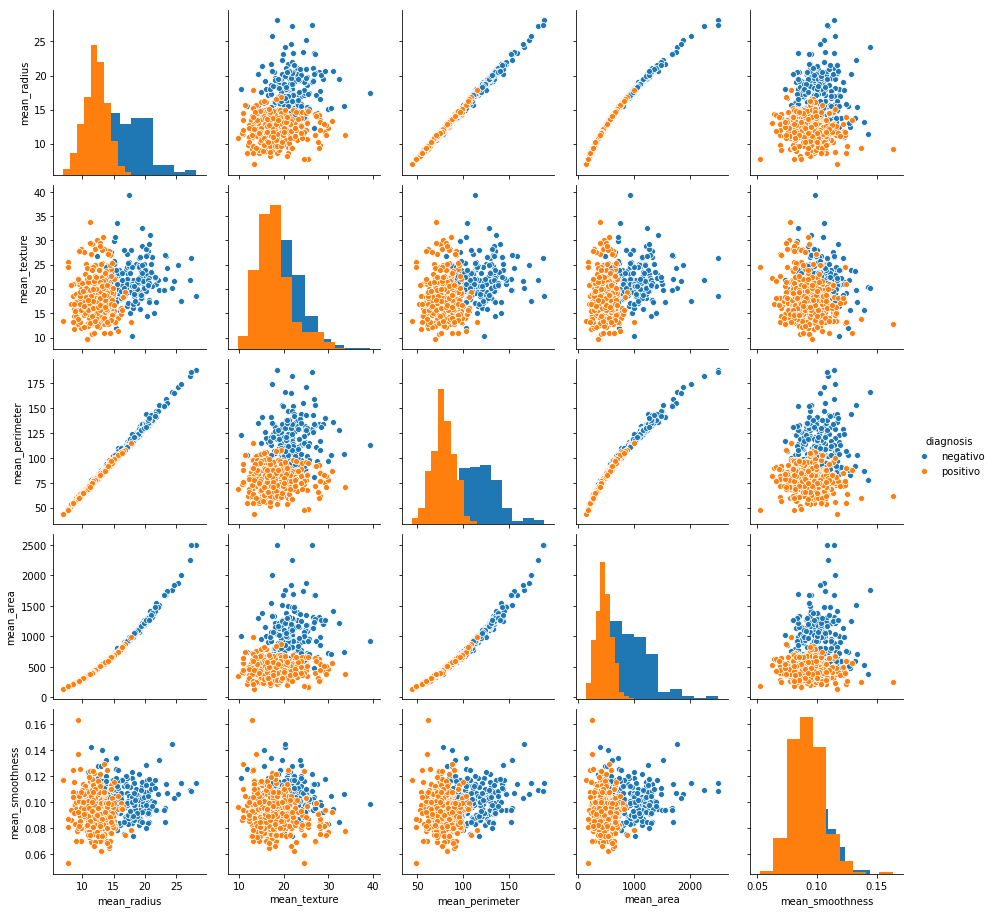

In [27]:
%matplotlib inline
import seaborn as sns
sns.pairplot(arquivo, hue='diagnosis',diag_kind="hist")

### Plotando o blox plot para cada um dos parâmetros

Text(0.5,1,'Basic Plot')

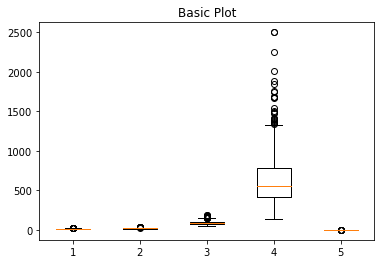

In [30]:
import numpy as np
import matplotlib.pyplot as plt

mean_radius = arquivo["mean_radius"]
mean_texture = arquivo["mean_texture"]
mean_perimeter = arquivo["mean_perimeter"]
mean_area = arquivo["mean_area"]
mean_smoothness = arquivo["mean_smoothness"]
columns = [mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]
fig, ax = plt.subplots()
ax.boxplot(columns)
ax.set_title('Basic Plot')

In [31]:
arquivo['diagnosis'] = arquivo['diagnosis'].replace('negativo',0)
arquivo['diagnosis'] = arquivo['diagnosis'].replace('positivo',1)
arquivo.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### Separando os dados em x e y

In [32]:
y = arquivo['diagnosis']
x = arquivo.drop('diagnosis', axis = 1)

### Normalizando os dados, na literatura isso garante um resultado na análise. Aqui é feito também a separação dos dados na proporção de 30% para teste e 70% train

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


### Fazendo o treinamento com o modelo KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Imprimindo a predição para classificação do conjunto x_teste

In [41]:
predictions = knn.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

### Apresentar Acurácia, Precisão, Revocação e F1-Score, do conjunto de teste, também é apresentado a matriz de confusão(A Matriz de confusão é uma matriz de valores reais e valores preditos pelo seu classificador.) no canto superior esquerdo.

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[58  8]
 [10 95]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        66
           1       0.92      0.90      0.91       105

   micro avg       0.89      0.89      0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.89      0.90       171



### Apresentando a acurácia

In [46]:
knn.score(X_test, y_test)

0.8947368421052632